In [61]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [62]:
#Get csv data file
climbstats = pd.read_csv('climbing_statistics.csv')

In [63]:
#look at header row to see what variables are in here
climbstats.head()

,Date,Route,Attempted,Succeeded,SuccessPercentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0
4,10/9/2015,Disappointment Cleaver,2,0,0.0


In [64]:
#check data types
climbstats.dtypes

Date                  object
Route                 object
Attempted              int64
Succeeded              int64
SuccessPercentage    float64
dtype: object

In [65]:
#Create dataframe
df = pd.DataFrame(climbstats)


In [66]:
#print summary stats
df.describe()

,Attempted,Succeeded,SuccessPercentage
count,4077.000000,4077.000000,4077.000000
mean,5.139318,2.710817,0.498999
std,3.813516,3.534148,0.512050
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,2.000000,0.583333
75%,8.000000,4.000000,1.000000
max,26.000000,71.000000,14.200000


In [67]:
#look at how many errors we have
df[df.SuccessPercentage >1]

,Date,Route,Attempted,Succeeded,SuccessPercentage
133,8/26/2015,Disappointment Cleaver,3,4,1.333333
191,8/21/2015,Disappointment Cleaver,1,2,2.000000
507,7/27/2015,Emmons-Winthrop,3,4,1.333333
589,7/20/2015,Disappointment Cleaver,5,71,14.200000
1156,6/23/2015,Disappointment Cleaver,2,5,2.500000
1399,6/12/2015,Disappointment Cleaver,10,11,1.100000
2709,7/24/2014,Disappointment Cleaver,7,8,1.142857
2970,7/11/2014,Kautz Glacier,11,12,1.090909
3010,7/10/2014,Disappointment Cleaver,3,4,1.333333
3196,7/3/2014,Disappointment Cleaver,1,2,2.000000


In [68]:
#delete all rows where SuccessPercentage is greater than 1 as these are errors
df.drop(df[df['SuccessPercentage'] > 1.00].index, inplace = True)

In [69]:
df.describe()

,Attempted,Succeeded,SuccessPercentage
count,4067.000000,4067.000000,4067.000000
mean,5.140644,2.687239,0.493333
std,3.814358,3.365363,0.462338
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,2.000000,0.583333
75%,8.000000,4.000000,1.000000
max,26.000000,12.000000,1.000000


<AxesSubplot:>

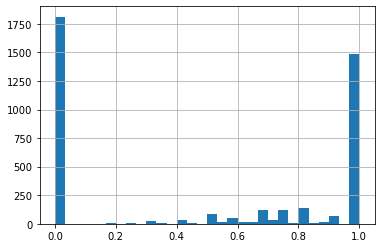

In [70]:
#make a histogram to view extreme values for success percentage
df['SuccessPercentage'].hist(bins=30)

In [71]:
#check for missing values
df.apply(lambda x: sum(x.isnull()),axis=0) #number of missing values in each column

Date                 0
Route                0
Attempted            0
Succeeded            0
SuccessPercentage    0
dtype: int64

In [72]:
#group data by route
grouped_df = df.groupby("Route")

In [73]:
#look at success percentage by route
newdf = grouped_df.mean()
print(newdf)

                                  Attempted  Succeeded  SuccessPercentage
Route                                                                    
Curtis RIngraham Directge          2.000000   1.000000           0.500000
Disappointment Cleaver             5.598162   3.031618           0.519465
Edmonds HW                         2.000000   0.000000           0.000000
Emmons-Winthrop                    4.825674   2.645008           0.533888
Fuhrer's Finger                    3.030769   1.215385           0.371795
Fuhrers Finger                     2.814815   0.333333           0.111111
Gibralter Chute                    2.600000   0.400000           0.200000
Gibralter Ledges                   2.618421   0.763158           0.269737
Ingraham Direct                    4.245283   0.301887           0.132075
Kautz Cleaver                      3.642857   1.142857           0.261905
Kautz Glacier                      5.182320   2.861878           0.526865
Kautz Headwall                     3.0

In [74]:
#Rename SuccessPercentage Column
newdf.rename (
    columns = ({'SuccessPercentage': 'SuccessPercent'}),
    inplace = True,
)
newdf.head()

,Attempted,Succeeded,SuccessPercent
Route,,,
Curtis RIngraham Directge,2.000000,1.000000,0.500000
Disappointment Cleaver,5.598162,3.031618,0.519465
Edmonds HW,2.000000,0.000000,0.000000
Emmons-Winthrop,4.825674,2.645008,0.533888
Fuhrer's Finger,3.030769,1.215385,0.371795


In [76]:
#Won't need these columns in the final table so drop  these
newdf.drop(columns=['Attempted', 'Succeeded'], inplace=True)

In [78]:
#Multiply the successpercent column by 100 so the table is easier to read and represents full percentage values
newdf['SuccessPercent'] = newdf['SuccessPercent'].apply(lambda x: x * 100)

In [81]:
#round successpercent values to 2 decimal places
newdf.SuccessPercent = round(newdf.SuccessPercent, 2)

In [85]:
#Final table with changes above applied
newdf.sort_values('SuccessPercent')

,SuccessPercent
Route,
Sunset Amphitheater,0.00
Liberty Wall,0.00
Edmonds HW,0.00
Wilson Headwall,0.00
Kautz Headwall,0.00
Sunset RIngraham Directge,0.00
Nisqually Glacier,0.00
glacier only - no summit attempt,4.55
Fuhrers Finger,11.11
